## 画二次函数

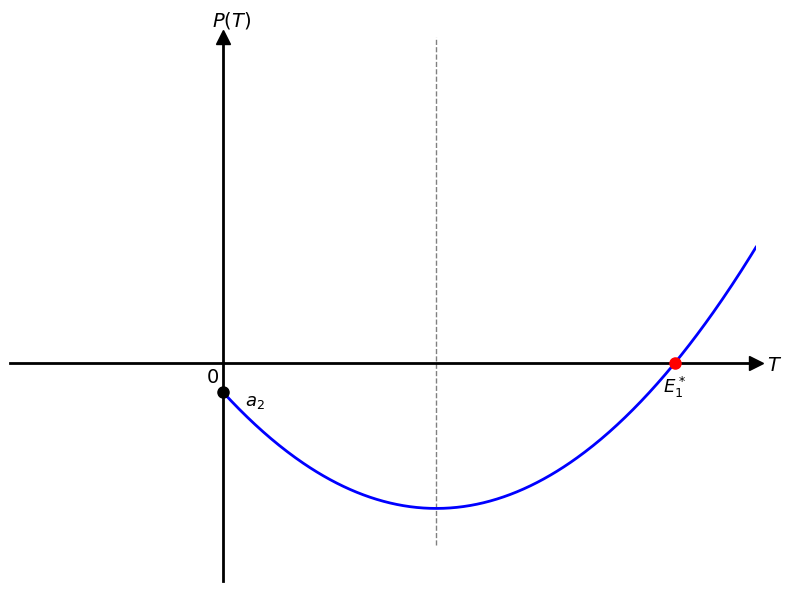

In [171]:
import numpy as np
import matplotlib.pyplot as plt

# 设置参数
a = 0.8    # 二次项系数，控制开口大小和方向
h, k = 2, -4  # 顶点坐标
x_min, x_max = 0, 5  # x轴范围

# 生成数据
x = np.linspace(x_min, x_max, 400)
y = a*(x - h)**2 + k

# 计算所有可能交点
possible_intercepts = sorted([h - np.sqrt(-k/a), h + np.sqrt(-k/a)])  # 排序后的所有与x轴交点

# 只保留在[x_min, x_max]范围内的交点
x_intercepts = sorted([xi for xi in possible_intercepts if x_min <= xi <= x_max])

# 计算y轴交点
y_intercept = a*h**2 + k

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))
# 然后绘制蓝色曲线
ax.plot(x, y, 'b-', linewidth=2, zorder=5)

# 先绘制红色交点（确保在最上层）
if x_intercepts:
    ax.plot(x_intercepts, [0]*len(x_intercepts), 'ro', markersize=8, zorder=10)

# 最后绘制y轴交点
if x_min <= 0 <= x_max:
    ax.plot(0, y_intercept, 'ko', markersize=8, zorder=10)

# 添加文本标签
ax.text(5.1, -0.2, '$T$', fontsize=14)
ax.text(-0.1, 9.3, r'$P(T)$', fontsize=14)
# ax.text(-0.1, 9.3, r'$P^{\prime}(T)$', fontsize=14)


# 根据交点数量自动编号
for i, xi in enumerate(x_intercepts, start=1):
    if len(x_intercepts) == 1:  # 只有一个交点
        ax.text(xi, -0.3, r'$E_1^*$', fontsize=13, ha='center', va='top')
    else:  # 两个交点
        if xi == x_intercepts[0]:  # 第一个交点
            ax.text(xi, -0.3, r'$E_1^*$', fontsize=13, ha='right', va='top')
        else:  # 第二个交点
            ax.text(xi, -0.3, r'$E_2^*$', fontsize=13, ha='left', va='top')

ax.text(0.3, y_intercept, r'$a_2$', fontsize=13, ha='center', va='top')
ax.text(-0.1, -0.1, r'$0$', fontsize=14, ha='center', va='top')

# 设置坐标轴
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2.0)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 添加箭头
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=10)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=10)

# 添加垂直虚线
ax.vlines(x=h, ymin=k-1, ymax=9, color='gray', linestyle='--', linewidth=1)

# 隐藏刻度
ax.set_xticks([])
ax.set_yticks([])

# 设置图形范围
ax.set_xlim(-2,5)
ax.set_ylim(k-2, 9)

plt.tight_layout()
plt.show()

## 画三次函数

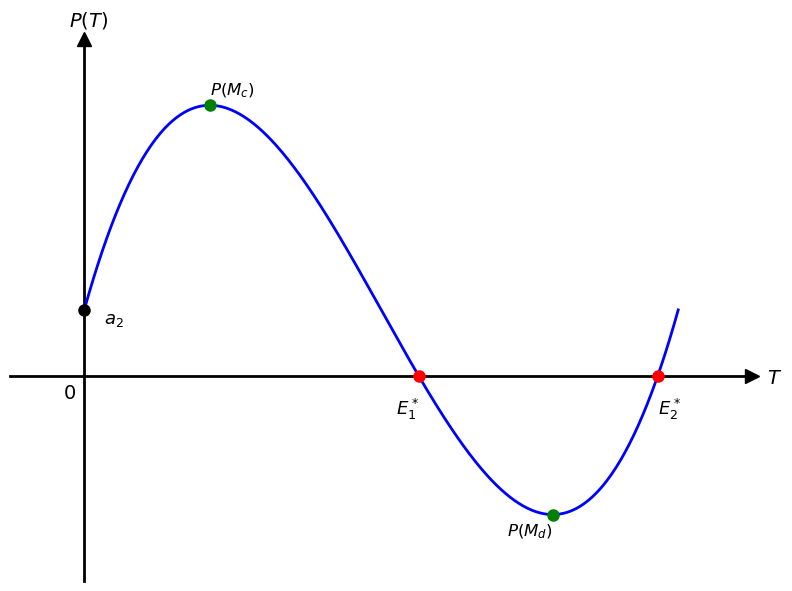

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize_scalar

# 设置参数
a = 1  # 三次项系数
b = -6  # 二次项系数
c =8  # 一次项系数
d = 1  # 常数项
x_min, x_max = 0, 4  # x轴范围

# 定义三次函数及其导数
def cubic_func(x):
    return a*x**3 + b*x**2 + c*x + d

def cubic_derivative(x):
    return 3*a*x**2 + 2*b*x + c

# 生成数据
x = np.linspace(x_min, x_max, 400)
y = cubic_func(x)

# 计算与x轴的交点（近似解）
def find_roots():
    roots = []
    # 在多个区间内寻找根
    for x0 in np.linspace(x_min, x_max, 20):  # 增加采样点提高准确性
        root = minimize_scalar(lambda x: abs(cubic_func(x)), 
                              bounds=(max(x_min, x0-1), min(x_max, x0+1)), 
                              method='bounded').x
        if abs(cubic_func(root)) < 1e-6 and x_min <= root <= x_max:
            roots.append(root)
    # 去重并排序
    roots = sorted(list(set(np.round(roots, 4))))
    return roots

x_intercepts = find_roots()

# 计算极值点
discriminant = (2*b)**2 - 4*3*a*c
if discriminant > 0:  # 有两个极值点
    x_extrema = sorted([(-2*b - np.sqrt(discriminant))/(6*a),
                       (-2*b + np.sqrt(discriminant))/(6*a)])
    extrema_points = [(x, cubic_func(x)) for x in x_extrema if x_min <= x <= x_max]
else:
    extrema_points = []

# 计算y轴交点
y_intercept = cubic_func(0)

# 创建图形
fig, ax = plt.subplots(figsize=(8, 6))

# 绘制三次曲线
ax.plot(x, y, 'b-', linewidth=2, zorder=5)

# 绘制与x轴的交点并动态标记
if x_intercepts:
    ax.plot(x_intercepts, [0]*len(x_intercepts), 'ro', markersize=8, zorder=10)
    
    # 根据交点数量动态标记
    for i, xi in enumerate(x_intercepts, start=1):
        if len(x_intercepts) == 1:  # 只有一个交点
            ax.text(xi, -0.3, r'$E_1$', fontsize=13, ha='center', va='top')
        elif len(x_intercepts) == 2:  # 两个交点
            if i == 1:
                ax.text(xi, -0.3, r'$E_1^*$', fontsize=13, ha='right', va='top')
            else:
                ax.text(xi, -0.3, r'$E_2^*$', fontsize=13, ha='left', va='top')
        else:  # 三个交点
            if i == 1:
                ax.text(xi, -0.3, r'$E_1^*$', fontsize=13, ha='right', va='top')
            elif i == 2:
                ax.text(xi, -0.3, r'$E_2^*$', fontsize=13, ha='center', va='top')
            else:
                ax.text(xi, -0.3, r'$E_3^*$', fontsize=13, ha='left', va='top')

# 绘制极值点
if extrema_points:
    for i, (x_ext, y_ext) in enumerate(extrema_points, start=1):
        ax.plot(x_ext, y_ext, 'go', markersize=8, zorder=10)
        ax.text(
            x_ext,                                  # x 坐标不变
            y_ext + (0.1 if y_ext > 0 else -0.1),   # y 坐标动态偏移
            f'$P(M_{"c" if i==1 else "d"})$', 
            fontsize=12, 
            ha='left' if i==1 else 'right',         # 水平对齐方式不变
            va='bottom' if y_ext > 0 else 'top'     # 垂直对齐方式不变
        )

# 绘制y轴交点
if x_min <= 0 <= x_max:
    ax.plot(0, y_intercept, 'ko', markersize=8, zorder=10)
    ax.text(0.2, y_intercept, r'$a_2$', fontsize=13, ha='center', va='top')

# 添加坐标轴标签
ax.text(x_max+0.6, -0.1, '$T$', fontsize=14)
ax.text(-0.1, max(y)+1.2, r'$P(T)$', fontsize=14)
ax.text(-0.1, -0.1, r'$0$', fontsize=14, ha='center', va='top')

# 设置坐标轴
for spine in ['left', 'bottom']:
    ax.spines[spine].set_position('zero')
    ax.spines[spine].set_color('black')
    ax.spines[spine].set_linewidth(2.0)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# 添加箭头
ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False, markersize=10)
ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False, markersize=10)

# 隐藏刻度
ax.set_xticks([])
ax.set_yticks([])

# 设置图形范围
ax.set_xlim(x_min-0.5, x_max+0.5)
ax.set_ylim(min(y)-1, max(y)+1)

plt.tight_layout()
plt.show()